# Практическая работа по "Data Science и обработка данных в маркетинге"

Цель работы - провести анализ цен автомобилей и их показательные характеристики, выявить интересные и возможные зависимости/закономерности в данных

Основные задачи: 
- Провести исследование выбранного датасета.
- Использовать полученные знания для статистического анализа данных

Описание данных:
- model - модель автомобиля
- year - год продажи авто
- price - цена, за которую была продана машина
- transmission - тип коробки передач (Manual, Automatic,Semi-Auto)
- mileage - пробег авто
- fuelType - каким топливом заправляют авто
- tax - "дорожный налог" который необходимо уплатить или включить в стоимость ТС
- mpg - показатель экономии топлива (средн/количество миль, которое авто может проехать на одном галлоне топлива
- engineSize - объем топлива, который может быть пропущен через цилиндры авто
- make - производитель авто (Audi, BMW, Toyota...)

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. фильтрация данных в pandas
сортировка данных в pandas
2. создание переменных в pandas, сохранение датафрейма pandas
3. группировка данных в pandas, базовая визуализация в pandas
4. меры центральной тенденции и группировка в pandas, меры разброса
5. рассчитываем z-оценку в pandas, находим выбросы в pandas, работа с пропущенными значениями
6. корреляция
7. визуализация

In [57]:
df = pd.read_csv('cars_dataset.csv')

# --------------------------------------------------------------------------- *

# 1. фильтрация данных в pandas сортировка данных в pandas

In [60]:
df.head() #Наши данные

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [61]:
df.Make.unique() # Проведем фильтрацию по маркам машин

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

In [75]:
filtr = df[((df.Make == 'BMW') | (df.Make == 'audi')) & (df.fuelType == 'Petrol')] 
#Давайте сравним характеристики два немца) в нашем случае это, BMW и Audi. Давайте еще возьмем бензиновые движки :D
filtr

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
5,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,audi
8,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
21418,2 Series,2014,15995,Automatic,58000,Petrol,265.0,37.2,3.0,BMW
21419,3 Series,2013,10295,Automatic,31850,Petrol,145.0,47.9,1.6,BMW
21420,3 Series,2010,7995,Automatic,41500,Petrol,200.0,41.5,2.0,BMW
21423,2 Series,2019,18887,Automatic,13955,Petrol,145.0,50.4,1.5,BMW


In [79]:
filtr.sort_values(by = ['year','price']) #Фильтрируем по годам и ценам по возрастанию

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
20293,5 Series,1996,5995,Automatic,36000,Petrol,270.0,26.4,2.8,BMW
20509,Z3,1997,3950,Manual,49000,Petrol,270.0,35.3,1.9,BMW
10427,A8,1997,4650,Automatic,122000,Petrol,265.0,18.9,4.2,audi
20510,Z3,1998,3950,Manual,56500,Petrol,270.0,35.3,1.9,BMW
9788,A3,1998,4999,Automatic,55000,Petrol,265.0,30.4,1.8,audi
...,...,...,...,...,...,...,...,...,...,...
10225,RS6,2020,104948,Automatic,3000,Petrol,145.0,22.1,4.0,audi
6384,RS6,2020,109495,Semi-Auto,1500,Petrol,150.0,22.1,4.0,audi
5459,R8,2020,133900,Semi-Auto,333,Petrol,145.0,21.4,5.2,audi
2255,R8,2020,137995,Semi-Auto,70,Petrol,145.0,21.1,5.2,audi



# * *-*-*-*-*-*--------------------------------------------------------------------------- *

# 3. группировка данных в pandas, базовая визуализация в pandas

In [89]:
filtr[['Make','transmission','price','tax','mileage']].groupby(['Make','transmission']).mean()
#Сдесь провели группировку по маркам и тип трансмиссии и посчитали средние от price, tax, mileage

price         tax       mileage
Make transmission                                        
BMW  Automatic     25364.465438  168.945853  18949.751152
     Manual        16299.633222  158.874025  23940.759197
     Semi-Auto     28209.395278  157.412228  11222.515738
audi Automatic     27949.026214  158.174757  16026.729126
     Manual        16859.112000  111.777778  22693.080444
     Semi-Auto     26416.343242  146.107684  15669.588334

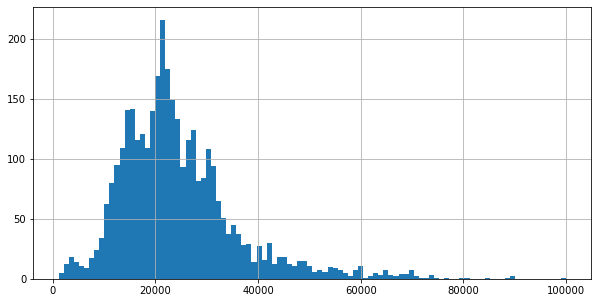

In [135]:
fig, ax = plt.subplots(1,1 ,figsize = (10,5))
ax.hist(filtr[filtr['Make'] == 'BMW']['price'], bins = 100)
ax.grid()
#Гистограмма показывает цены марки машины BMW

# * *-*-*-*-*-*--------------------------------------------------------------------------- *

# 4. меры центральной тенденции и группировка в pandas, меры разброса

In [141]:
filtr[filtr['Make'] == 'BMW'].describe() #Метод describe показывает самые основные статистические показатели

,year,price,mileage,tax,mpg,engineSize
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,2017.537021,24360.271583,16524.097454,160.725783,42.904009,2.152063
std,2.626627,11527.267589,19591.399460,58.876583,7.672533,0.669197
min,1996.000000,1200.000000,3.000000,20.000000,19.100000,0.000000
25%,2017.000000,16950.000000,3412.000000,145.000000,37.700000,1.500000
50%,2019.000000,21999.000000,9097.000000,145.000000,42.800000,2.000000
75%,2019.000000,29000.000000,23910.000000,150.000000,48.700000,3.000000
max,2020.000000,99950.000000,141000.000000,580.000000,68.900000,6.600000


In [146]:
filtr[filtr['Make'] == 'BMW'][['year','price','tax','mpg','engineSize']].max() #Максимальные значения по всем числовым столбцам

year           2020.0
price         99950.0
tax             580.0
mpg              68.9
engineSize        6.6
dtype: float64

In [147]:
filtr[filtr['Make'] == 'BMW'][['year','price','tax','mpg','engineSize']].min() #минимальные значения по всем числовым столбцам

year          1996.0
price         1200.0
tax             20.0
mpg             19.1
engineSize       0.0
dtype: float64



# * *-*-*-*-*-*--------------------------------------------------------------------------- *

# 5. рассчитываем z-оценку в pandas, находим выбросы в pandas, работа с пропущенными значениями

In [154]:
X = filtr[filtr['Make'] == 'BMW'][['price','tax','mpg','engineSize']]
z = (X - X.mean())/X.std()
#Здесь X наши данные, X.mean() - средние по всем столбикам, X.std() - стандартное откл. по формуле z = (X – μ) / σ
z

,price,tax,mpg,engineSize
10669,0.228999,-0.267097,-0.013556,-0.227232
10675,-0.703573,-0.267097,1.224627,-0.974397
10693,-1.141664,-0.606791,1.354962,-0.974397
10701,-0.334882,-0.267097,-0.404561,1.267096
10702,-1.080939,-0.267097,1.354962,-0.974397
...,...,...,...,...
21418,-0.725694,1.771064,-0.743432,1.267096
21419,-1.220174,-0.267097,0.651153,-0.824964
21420,-1.419701,0.667060,-0.182992,-0.227232
21423,-0.474811,-0.267097,0.976990,-0.974397


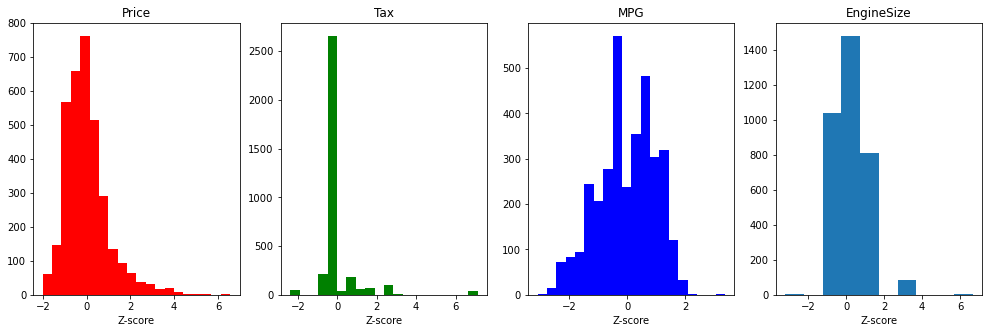

In [219]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize = (17,5))
ax1.hist(z.price, bins = 20, color = 'red')
ax2.hist(z.tax, bins = 20, color = 'green')
ax3.hist(z.mpg, bins = 20, color = 'blue')
ax4.hist(z.engineSize, bins = 10)

text_xlabel = ['Price','Tax','MPG','EngineSize']
ax = [ax1,ax2, ax3, ax4]
for i in range(len(ax)):
    ax[i].set_xlabel('Z-score')
    ax[i].set_title(text_xlabel[i])
    


# 
# * *-*-*-*-*-*--------------------------------------------------------------------------- *

# 6. корреляция

In [230]:
X.corr() #Посчитаем корреляцию по нашим данным (BMW)


,price,tax,mpg,engineSize
price,1.000000,-0.060336,-0.609007,0.515582
tax,-0.060336,1.000000,-0.426292,0.480687
mpg,-0.609007,-0.426292,1.000000,-0.723679
engineSize,0.515582,0.480687,-0.723679,1.000000


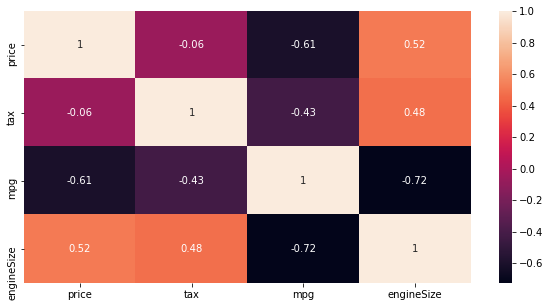

In [233]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(X.corr(),annot=True)
#Корреляция показывает нам связь между факторами

# 7.визуализация

In [253]:
filtr[filtr['Make'] == 'BMW']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
10669,6 Series,2018,27000,Automatic,14827,Petrol,145.0,42.8,2.0,BMW
10675,2 Series,2018,16250,Manual,10401,Petrol,145.0,52.3,1.5,BMW
10693,1 Series,2016,11200,Manual,23005,Petrol,125.0,53.3,1.5,BMW
10701,1 Series,2017,20500,Automatic,24029,Petrol,145.0,39.8,3.0,BMW
10702,1 Series,2017,11900,Manual,22920,Petrol,145.0,53.3,1.5,BMW
...,...,...,...,...,...,...,...,...,...,...
21418,2 Series,2014,15995,Automatic,58000,Petrol,265.0,37.2,3.0,BMW
21419,3 Series,2013,10295,Automatic,31850,Petrol,145.0,47.9,1.6,BMW
21420,3 Series,2010,7995,Automatic,41500,Petrol,200.0,41.5,2.0,BMW
21423,2 Series,2019,18887,Automatic,13955,Petrol,145.0,50.4,1.5,BMW


Text(0.5, 1.0, 'Цена BMW по годам')

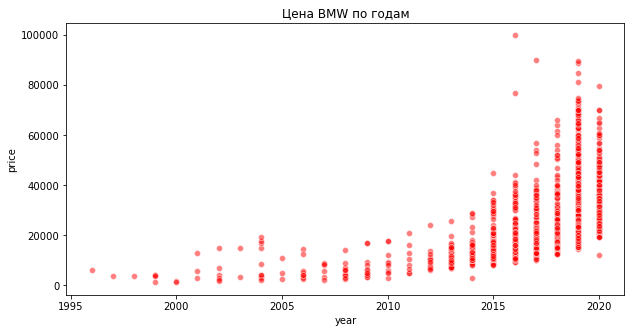

In [255]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.scatterplot(y = filtr[filtr['Make'] == 'BMW']['price'], x = filtr[filtr['Make'] == 'BMW']['year'], data = filtr, alpha=0.5, color = 'red')
ax.set_title('Цена BMW по годам')

In [69]:
# df['44. Ваш род занятий? '].hist(figsize = (10,5), bins=10, xlabelsize=12, xrot=30)